In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

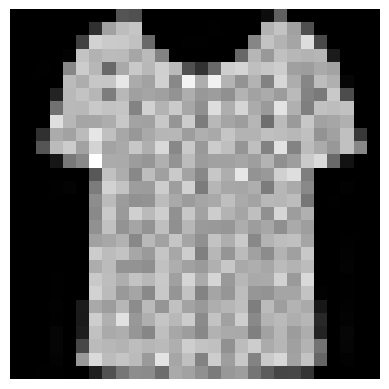

Çıkarılan mesaj: 


In [9]:
from PIL import Image
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

def embed_char_dct(image, char):
    img = image.convert('L')
    arr = np.array(img, dtype=np.float32)
    
    binary_char = format(ord(char), '08b')
    i, j = 0, 0
    block = arr[i:i+8, j:j+8]
    dct_block = dct2(block)
    
    for k in range(8):
        val = int(dct_block[1, k])  # daha güvenli katsayılar
        val = (val & ~1) | int(binary_char[k])
        dct_block[1, k] = val

    arr[i:i+8, j:j+8] = idct2(dct_block)
    new_img = Image.fromarray(np.clip(arr, 0, 255).astype(np.uint8))
    return new_img

def extract_char_dct(image):
    img = image.convert('L')
    arr = np.array(img, dtype=np.float32)
    
    i, j = 0, 0
    block = arr[i:i+8, j:j+8]
    dct_block = dct2(block)
    
    bits = ''
    for k in range(8):
        bits += str(int(dct_block[1, k]) & 1)
    
    return chr(int(bits, 2))

# Resmi yükle
image_path = "/kaggle/input/fashion-mnist-png/test/0/1000.png"
image = Image.open(image_path)

# Mesajı sakla
message = "a"
embedded = embed_char_dct(image, message)

# Göster
plt.imshow(embedded, cmap='gray')
plt.axis('off')
plt.show()

# Mesajı çöz
decoded = extract_char_dct(embedded)
print("Çıkarılan mesaj:", decoded)
